C:/Users/garfi/python_advanced/harmony_grader/testx.xml


INFO: GRADER : The results of analysis show the next warnings: 
INFO: VOICE MANAGER :voice crossing in measure 1, note position 1.5 Alto-v0 Soprano-v0
INFO: VOICE MANAGER :voice crossing in measure 1, note position 0.0 Alto-v0 Soprano-v0
INFO: VOICE MANAGER :voice crossing in measure 1, note position 1.0 Alto-v0 Soprano-v0
INFO: PARALLELISM CHECKER :hidden parallel fifths in measure 2 note position 0.0 Alto-v0 Soprano-v0
INFO: PARALLELISM CHECKER :hidden parallel fifths in measure 2 note position 2.0 Tenor-v0 Soprano-v0
INFO: PARALLELISM CHECKER :parallel octaves in measure 1 note position 1.5 Bass-v0 Soprano-v0
INFO: PARALLELISM CHECKER :hidden parallel octaves in measure 1 note position 2.0 Bass-v0 Soprano-v0
INFO: PARALLELISM CHECKER :hidden parallel fifths in measure 2 note position 0.0 Bass-v0 Soprano-v0
INFO: PARALLELISM CHECKER :parallel octaves in measure 2 note position 2.0 Tenor-v0 Alto-v0
INFO: PARALLELISM CHECKER :hidden parallel fifths in measure 1 note position 2.5 Tenor-

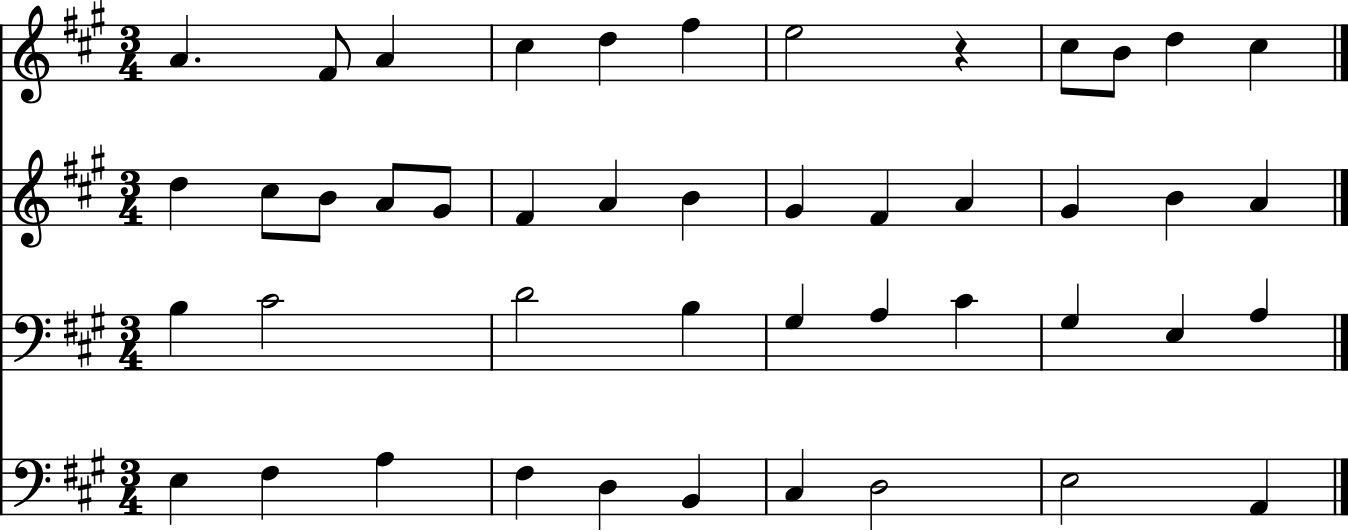

In [6]:
from itertools import combinations
from score_document import ScoreDocument
from builder import Builder
from all_voices_up import VoiceUpDetector


from logging import getLogger


class Grader:
    def __init__(self, score_doc: ScoreDocument):
        self.doc = score_doc
        self.logger = getLogger(" GRADER ")

    def manage_run(self, pair):
        """ manager function that takes a pair of voices,
        converts the data from them and launches the check for parallelisms"""
        builder = Builder(pair[-1], pair[0])
        builder.manage_run()

    def show_score(self):
        """ this function is showing the score - good for Jupyter Notebook """
        self.doc.score.show()

    def run_parallelisms(self):
        """ function that runs the preparation of each pair of stream.Part objects"""
        for pair in combinations(self.doc.test_score_voices, 2):
            self.manage_run(pair)

    def run_all_voices_up(self):
        """ function that creates the same-direction detector and runs the check"""
        detector = VoiceUpDetector(self.doc.score)
        detector.run()


def launch_grader():

    file_link = str(input())
    doc = ScoreDocument(file_link)
    grader = Grader(doc)
    # with open("log.txt", "w", encoding='utf-8') as log_file:
    #     log_file.write("The results of analysis show the next warnings:"+'\n')
    grader.logger.info(" The results of analysis show the next warnings: ")
    grader.run_parallelisms()
    grader.run_all_voices_up()
    grader.show_score()


if __name__ == "__main__":
    import logging

    logging.basicConfig(level=logging.INFO)
    launch_grader()